In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np
from math import pi

In [23]:
# ==========================================
# 1. LOAD DATA
# ==========================================

df = pd.read_csv('benchmark_results.csv')

# Create a full configuration label for better plotting
df['Configuration'] = df['Strategy'] + " + " + df['Restart']

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [24]:
# ==========================================
# 2. PREPROCESSING
# ==========================================
def get_label(row):
    if row['SolverType'] == 'Complete':
        return "Complete (CP)"
    return row['SolverType'].replace('_', ' ')

df['Label'] = df.apply(get_label, axis=1)
df['IsSolved'] = df['Status'] == 'SOLVED'

# Compute Success Rate per Difficulty
pivot = df.pivot_table(index='Label', columns='Difficulty', values='IsSolved', aggfunc='mean').fillna(0) * 100

# Reorder columns to ensure meaningful rotation (Easy -> Medium -> Hard)
ordered_cols = ['Easy', 'Medium', 'Hard']
# Add a dummy col or duplicate first to close loop? No, matplotlib handles it.
# Ensure all columns exist
for col in ordered_cols:
    if col not in pivot.columns:
        pivot[col] = 0
pivot = pivot[ordered_cols]

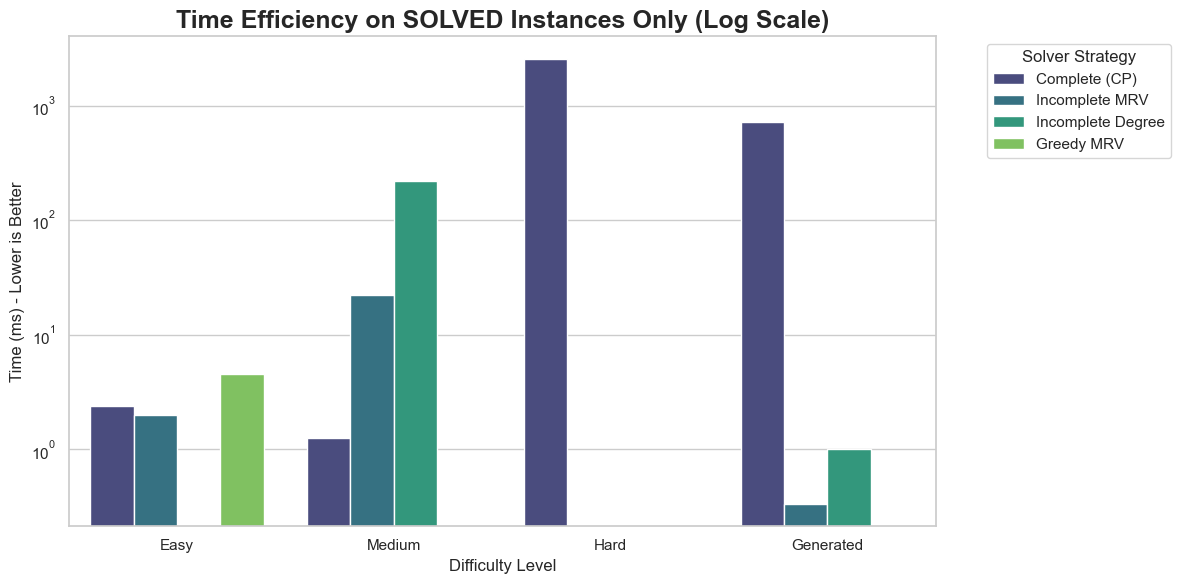

In [25]:
# ==========================================
# 3. CHART 1: TIME EFFICIENCY (Only Solved)
# ==========================================
# Crucial: Filter only SOLVED instances for time comparison
df_solved = df[df['IsSolved'] == True].copy()

plt.figure()
ax = sns.barplot(
    data=df_solved, 
    x="Difficulty", 
    y="Time(ms)", 
    hue="Label", 
    palette="viridis",
    errorbar=None
)

plt.yscale("log")
plt.title("Time Efficiency on SOLVED Instances Only (Log Scale)", fontsize=18, fontweight='bold')
plt.ylabel("Time (ms) - Lower is Better")
plt.xlabel("Difficulty Level")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Solver Strategy")
plt.tight_layout()
plt.show()

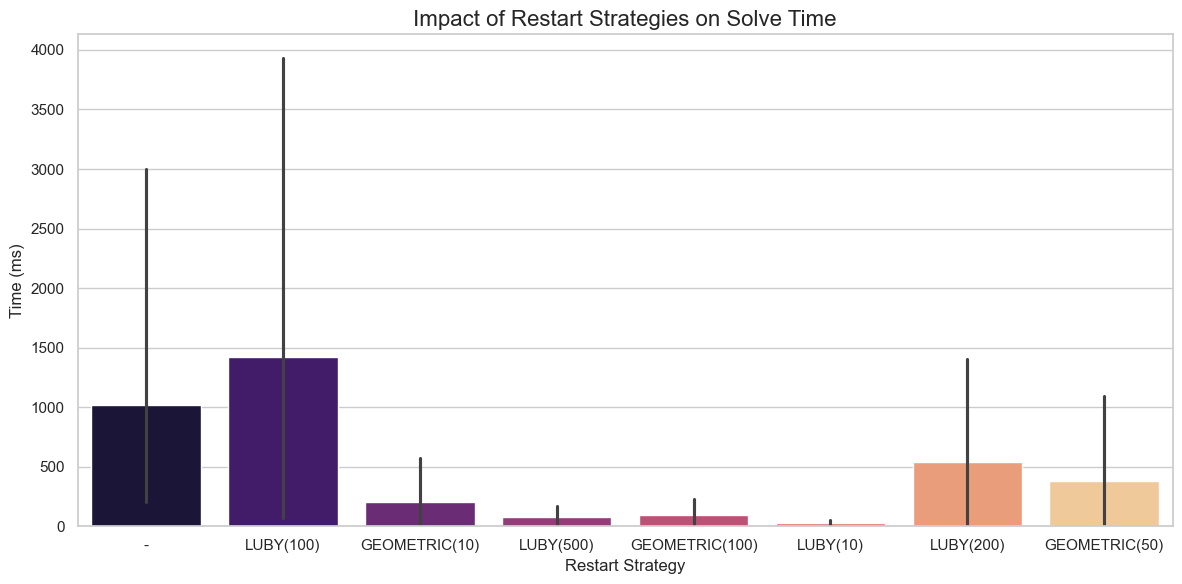

In [26]:
# ==========================================
# 4. VISUALIZATION: Impact of Restart Strategy
# ==========================================
# Grouping by Restart strategy to see general impact
plt.figure()
sns.barplot(x="Restart", y="Time(ms)", data=df, hue="Restart", palette="magma")
plt.title("Impact of Restart Strategies on Solve Time", fontsize=16)
plt.ylabel("Time (ms)")
plt.xlabel("Restart Strategy")
plt.tight_layout()
plt.show()

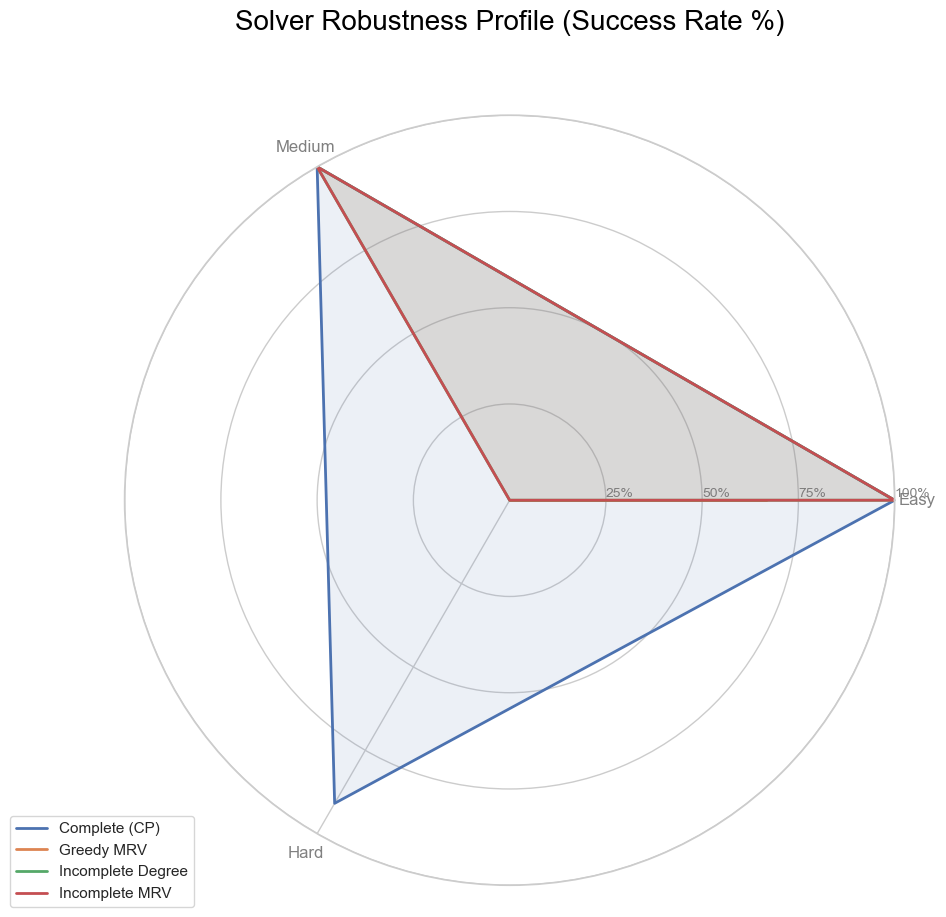

In [27]:
# ==========================================
# 3. RADAR CHART
# ==========================================
# Attributes (Axes)
categories = list(pivot.columns)
N = len(categories)

# Angles for the axes
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] # Close the loop

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + labels
plt.xticks(angles[:-1], categories, color='grey', size=12)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25, 50, 75, 100], ["25%", "50%", "75%", "100%"], color="grey", size=10)
plt.ylim(0, 100)

# Plot each solver
colors = ['b', 'r', 'g', 'orange']
for idx, (label, row) in enumerate(pivot.iterrows()):
    values = row.tolist()
    values += values[:1] # Close the loop
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, alpha=0.1)

plt.title("Solver Robustness Profile (Success Rate %)", size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()